In [1]:
import jax
import jax.numpy as jnp
from jax.scipy.optimize import minimize
import matplotlib.pyplot as plt

from softdtw_jax.softdtw_jax import SoftDTW

## Barycenter of time-series

In [2]:
def l2_distance(a, b):
    return jnp.mean(jnp.sum(jnp.square(a - b), axis=-1))

def barycenter(timeseries, metric=l2_distance):
    # Function to calculate the loss
    @jax.jit
    def loss_fn(curve):
        return sum(metric(curve, ts) for ts in timeseries)

    init = jnp.zeros(timeseries[1].shape)
    result = minimize(loss_fn, init, method='bfgs').x
    return result

In [3]:
t  = jnp.linspace(0, 2*jnp.pi, 32)
timeseries_1 = jnp.sin(t)
timeseries_2 = jnp.cos(t)
series = [timeseries_1, timeseries_2]

print('Calculating L2 Barycenter')
l2_barycenter   = barycenter(series, metric=l2_distance)
print('Calculating SDTW Barycenter')
sdtw_barycenter = barycenter(series, metric=SoftDTW(gamma=0.1))

Calculating L2 Barycenter
Calculating SDTW Barycenter


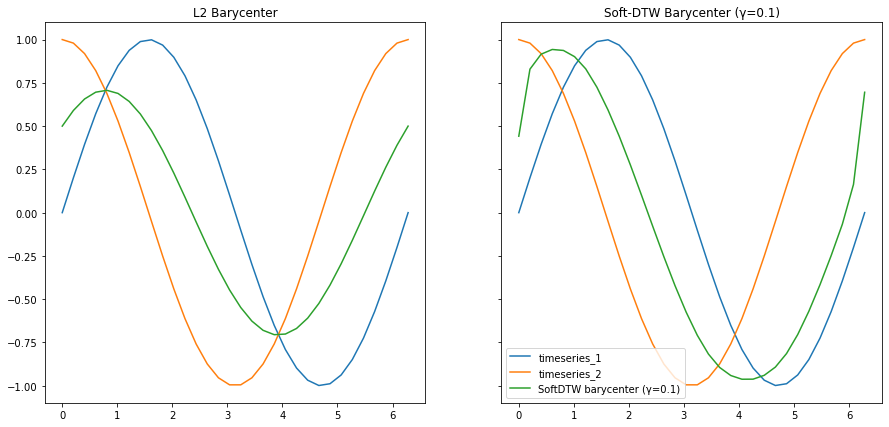

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

for ax in axs:
    ax.plot(t, timeseries_1, label='timeseries_1')
    ax.plot(t, timeseries_2, label='timeseries_2')

axs[0].plot(t, l2_barycenter, label='l2_barycenter')
axs[0].set_title('L2 Barycenter')
axs[1].plot(t, sdtw_barycenter, label='SoftDTW barycenter (γ=0.1)')
axs[1].set_title('Soft-DTW Barycenter (γ=0.1)') 

plt.legend()